# Airline Company

## Contest : Degree of customer satisfaction of an airline with prediction models Random Forest Classifier and XGboost Classifier

In [70]:
# Import package/module for data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import modules for feature engineering and modelling

from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from scipy.stats import median_abs_deviation
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [6]:
#import train data

df_train = pd.read_csv('train.csv',index_col = 0)

In [7]:
#import test data

df_test = pd.read_csv('test.csv',index_col = 0)

In [8]:
#Show information train data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

Data train has 24 columns with the different dtype based about type of numerical data and 5 categorical columns.

In [10]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


".Describe()" shows descriptive statics for each column. It is possible to note summary statitics like mean, std and the percentile furthermore it's very useful to understand whether some columns have outliers  and missing values.
"Arrival Delay in Minutes" column have missing values.
In an initial approach "Departure Delay in Minutes" and "Arrival Delay in Minutes" seem to have outliers.

In [11]:
# The same if for the test data
df_test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [12]:
#check for the presence of missing values

df_train.duplicated().value_counts()

False    103904
dtype: int64

In [13]:
df_test.duplicated().value_counts()

False    25976
dtype: int64

## Handling Missing Values

### with Missingno package

In [14]:
#Check missing values train data

df_train.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

The "Arrival Delay in Minutes " column has 310 missing values.

In [15]:
#Check missing values test data

df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In the test data the "Arrival Delay in Minutes " column has 83 missing values.

###### Percentage of missingness
###### "Arrival Delay in Minutes" column: 0.29%  of missingness in the train dataframe and 0.32 % in the test dataframe

With this percentage it is necessary impute them

In [16]:
df_train.isnull().mean()*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [17]:
df_test.isnull().mean()*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

### Detect the type of missingness (MCAR, MAR, MNAR) of the Train database

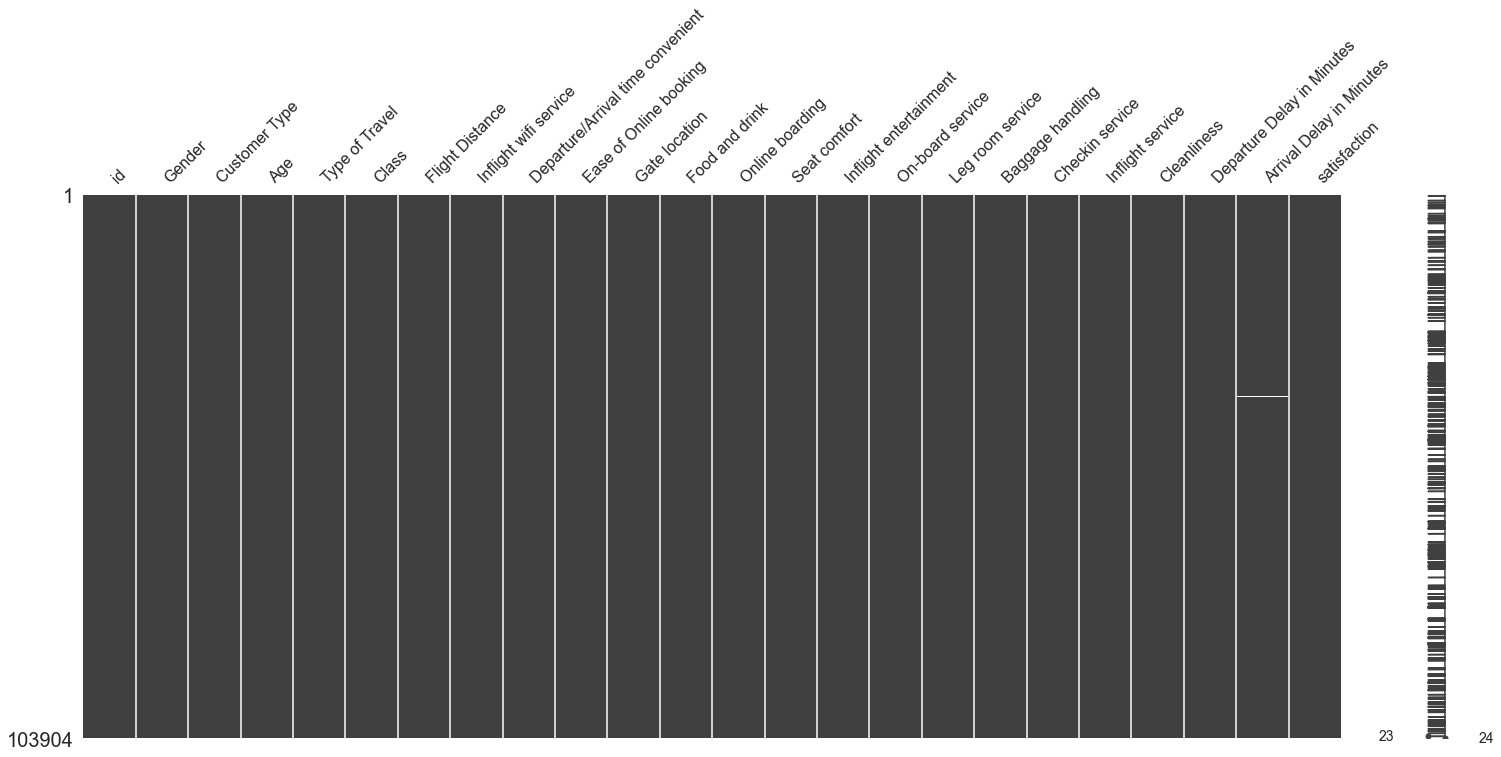

In [18]:
# Matrix Plot

msno.matrix(df_train);

When the value of a specific column is absent, the graph is displayed in white as in the case of "Arrival delay " column.

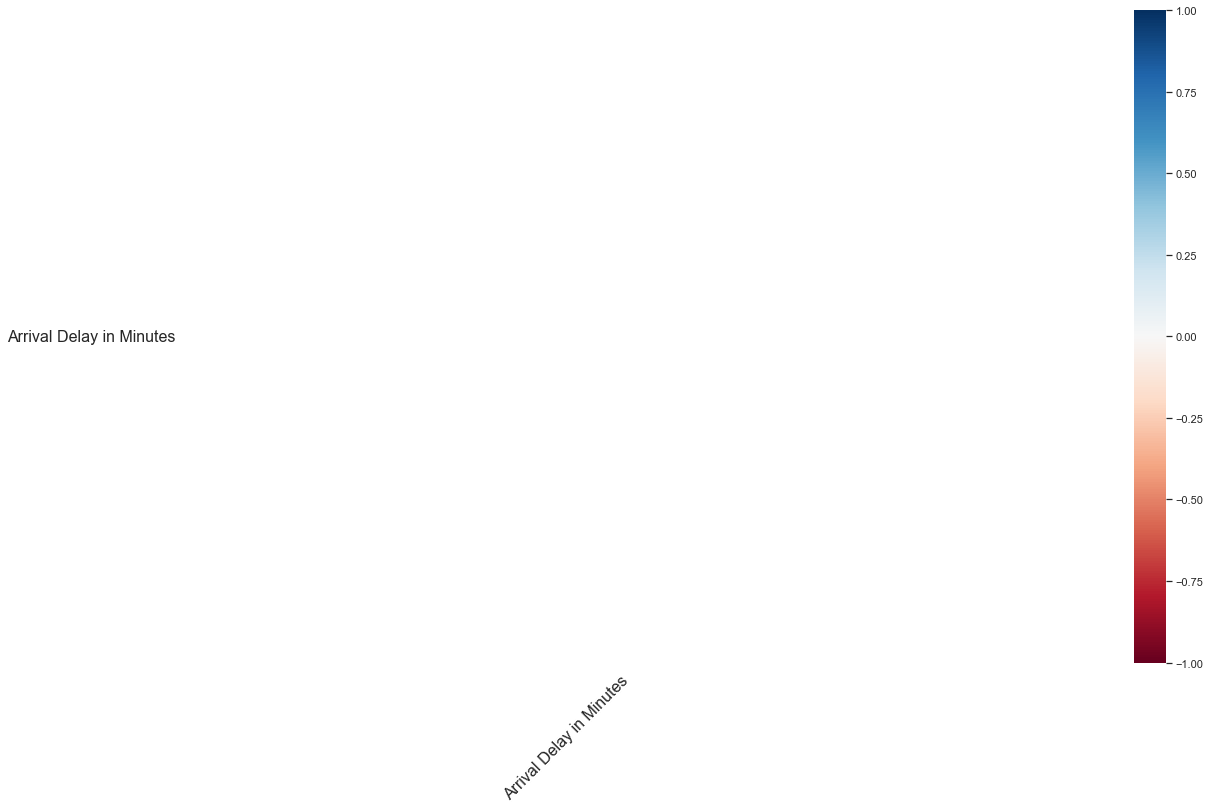

In [19]:
# Heatmap to show missingess correaltion

msno.heatmap(df_train);

It seem no missing values correlation about columns.

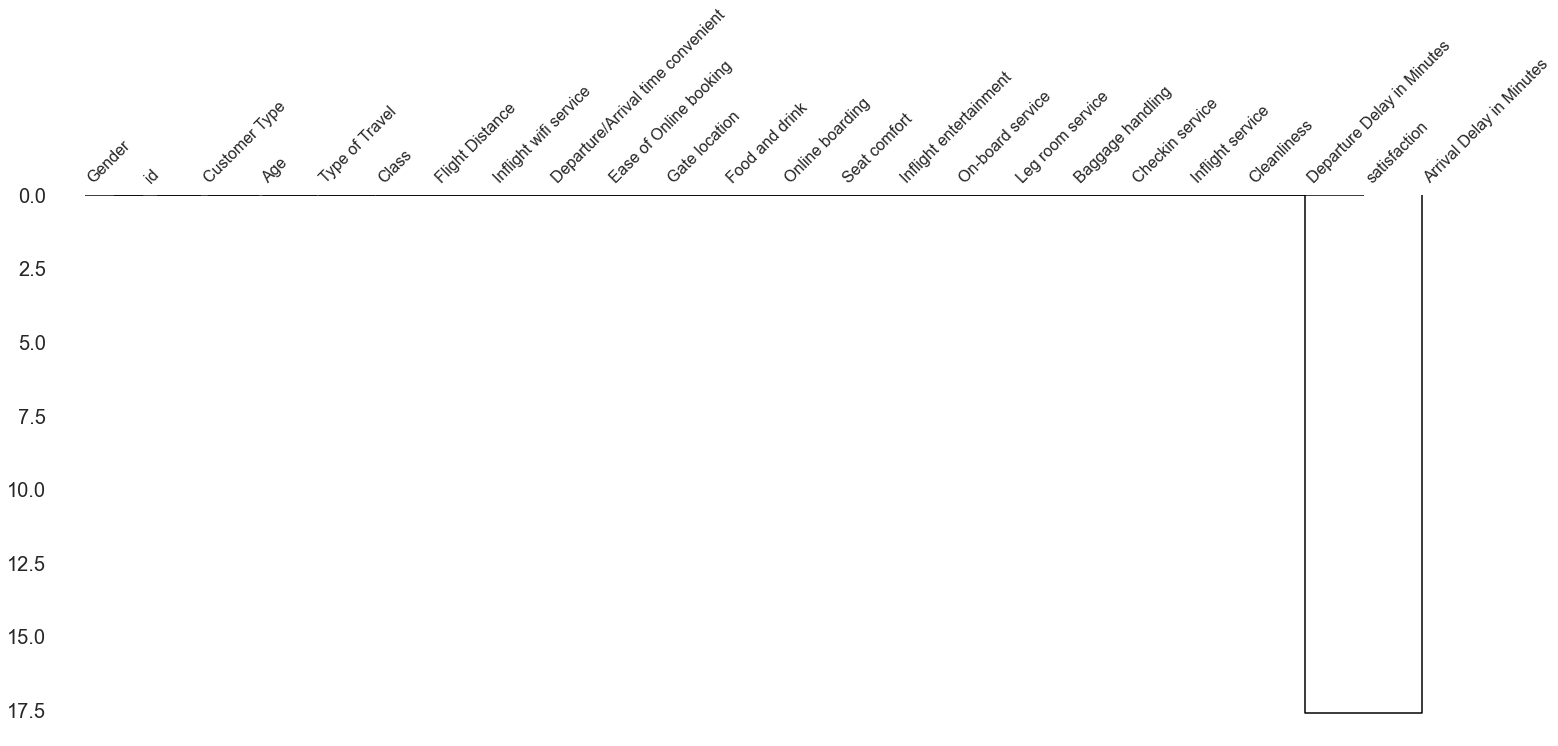

In [20]:
# Check with dendrogram

msno.dendrogram(df_train);

With dedrogrma graphs it is possible understand the correlation with no missing values because the columns are in the same level of distance, however  "Arrival Delay in Minutes" column is a MNAR type , the pattern is no clear, few missing values, and in a first approch seem to be a MCAR,  however there is a strong correlation with "Departure Delay in Minutes" variable.

#### Standard missing values imputation techniques

In [21]:
# Prepare Data to imputer

dftrain_imputer_num = df_train[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].copy()
dftrain_imputer_num = dftrain_imputer_num.select_dtypes(include = np.number)
columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']


# Mean Imputation

mean_imputer = SimpleImputer(strategy='mean')
dftrain_mean_imputer = mean_imputer.fit_transform(dftrain_imputer_num)
dftrain_mean_imputer = pd.DataFrame(dftrain_mean_imputer, columns= columns)

# Median Imputation

median_imputer = SimpleImputer(strategy='median')
dftrain_median_imputer = median_imputer.fit_transform(dftrain_imputer_num)
dftrain_median_imputer = pd.DataFrame(dftrain_median_imputer, columns= columns)


# Mode Imputation

mode_imputer = SimpleImputer(strategy='most_frequent')
dftrain_mode_imputer = mode_imputer.fit_transform(dftrain_imputer_num)
dftrain_mode_imputer = pd.DataFrame(dftrain_mode_imputer, columns= columns)


# Costant Imputation

constant_imputer = SimpleImputer(strategy='constant')
dftrain_constant_imputer = constant_imputer.fit_transform(dftrain_imputer_num)
dftrain_constant_imputer = pd.DataFrame(dftrain_constant_imputer, columns= columns)

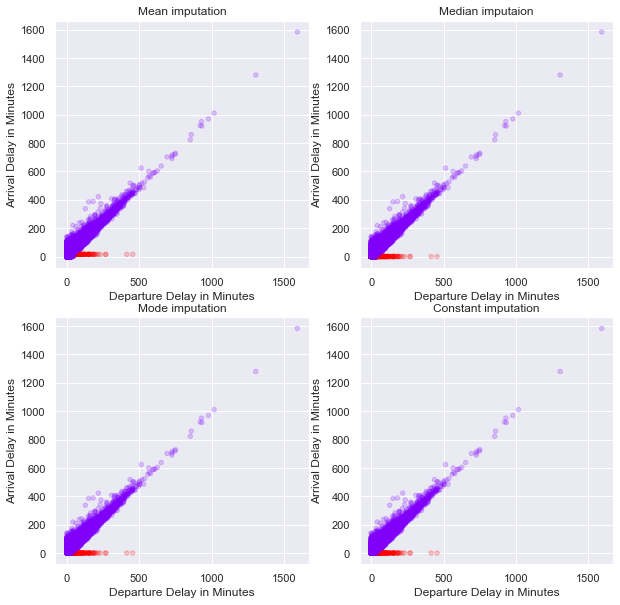

In [22]:
#Plot different methods

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

nullity = dftrain_imputer_num['Arrival Delay in Minutes'].isnull() 

imputations = {'Mean imputation' : dftrain_mean_imputer,
              'Median imputaion': dftrain_median_imputer,
              'Mode imputation': dftrain_mode_imputer,
              'Constant imputation': dftrain_constant_imputer}

for ax, df_key in zip (axes.flatten(), imputations):
    imputations[df_key].plot(x = 'Departure Delay in Minutes',y = 'Arrival Delay in Minutes', kind = 'scatter', c = nullity,
                            cmap = 'rainbow',colorbar = False ,alpha = 0.2, title = df_key, ax = ax)

Observed the graph there is a clear correlation about 'Arrival Delay in Minutes' and 'Departure Delay in Minutes'.
However the imputed values are the red values just lie in straight line and also these kind of imputation are sensitive with the outliers.
Thus i decided to use an advanced imputation method with KNN imputer.


In [23]:
from sklearn.impute import KNNImputer

#Knn Imputation

knn_imp = KNNImputer(n_neighbors=3)

df_trainKNN_imputer= knn_imp.fit_transform(dftrain_imputer_num)
df_trainKNN_imputer = pd.DataFrame(df_trainKNN_imputer, columns= dftrain_imputer_num.columns)

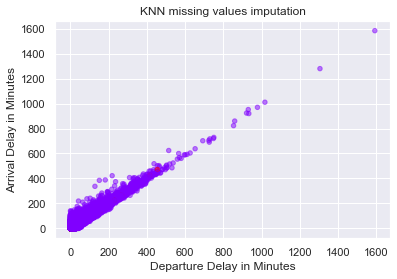

In [24]:

nullity = dftrain_imputer_num['Arrival Delay in Minutes'].isnull()
df_trainKNN_imputer.plot(x = 'Departure Delay in Minutes',y = 'Arrival Delay in Minutes', kind = 'scatter', c = nullity, cmap = 'rainbow',colorbar = False ,alpha = 0.5, title = 'KNN missing values imputation');

It could be it a strong positive correlation about 'Departure Delay' and 'Arrival Delay' and the red values are adapted better than the standard imputation methods of missing values

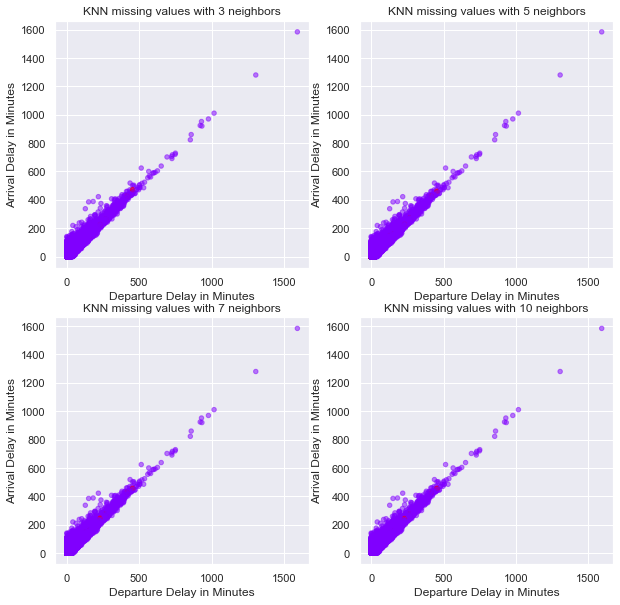

In [25]:
# Tuning the best k-neighbor

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

n_neighbors = [3, 5, 7, 10]
nullity = dftrain_imputer_num['Arrival Delay in Minutes'].isnull()

for  ax, n in zip ( axes.flatten(), n_neighbors):
    knn_imp = KNNImputer(n_neighbors= n)

    df_trainKNN_imputer= knn_imp.fit_transform(dftrain_imputer_num)
    df_trainKNN_imputer = pd.DataFrame(df_trainKNN_imputer, columns= dftrain_imputer_num.columns)
    
    df_trainKNN_imputer.plot(x = 'Departure Delay in Minutes',y = 'Arrival Delay in Minutes', kind = 'scatter', c = nullity, cmap = 'rainbow',
                             colorbar = False ,alpha = 0.5, title = f'KNN missing values with {n} neighbors', ax = ax);
    


It can be deduced from the graph that the best K value is K = 3 or k = 5 as it fits well on the strong correlation between the 2 variables.
As is a unsupervised classification it is possible evaluate the model with an estimator as Logistic Regression with MAE that is robust with the outliers

### Detect the type of missingness (MCAR, MAR, MNAR) of the Test database

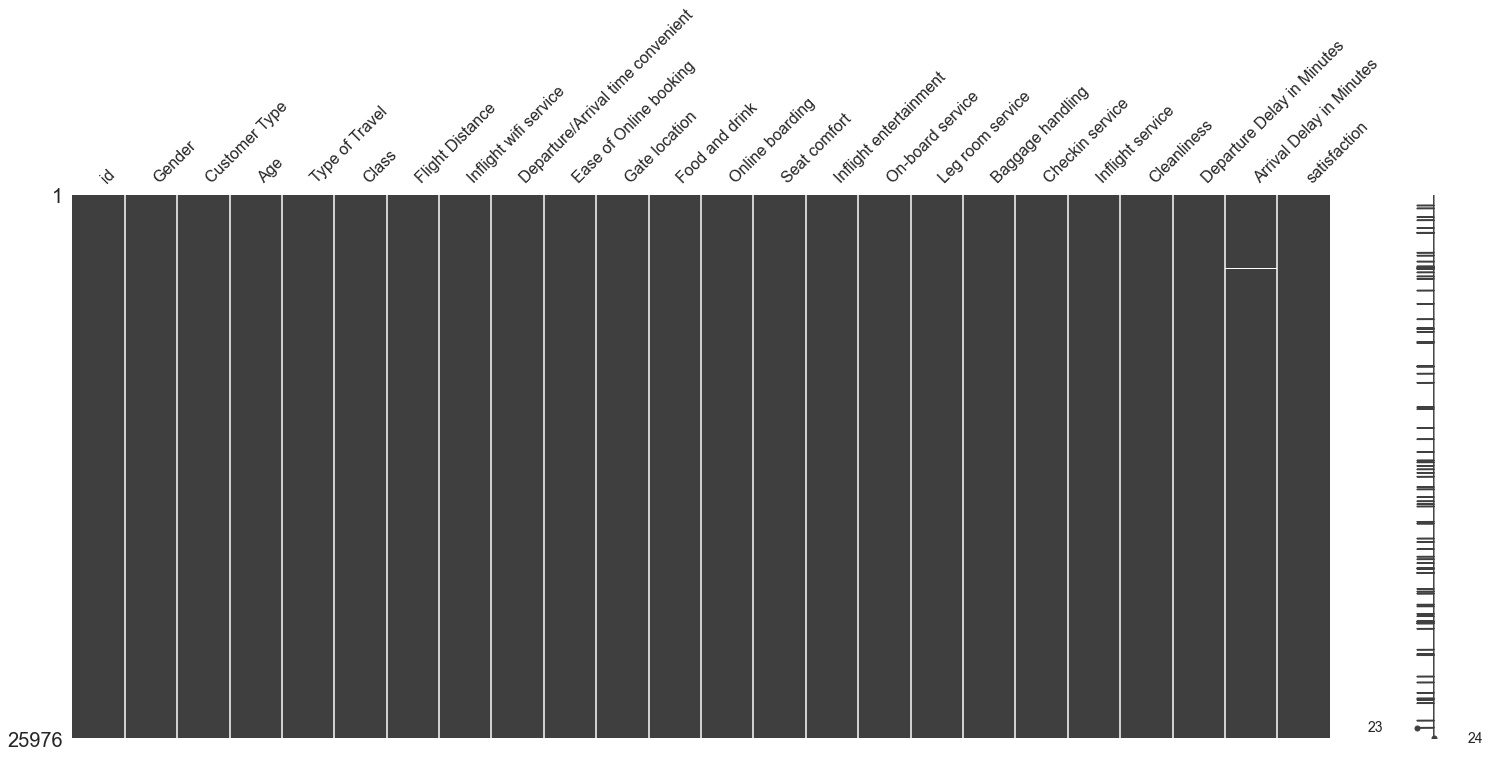

In [22]:
msno.matrix(df_test);

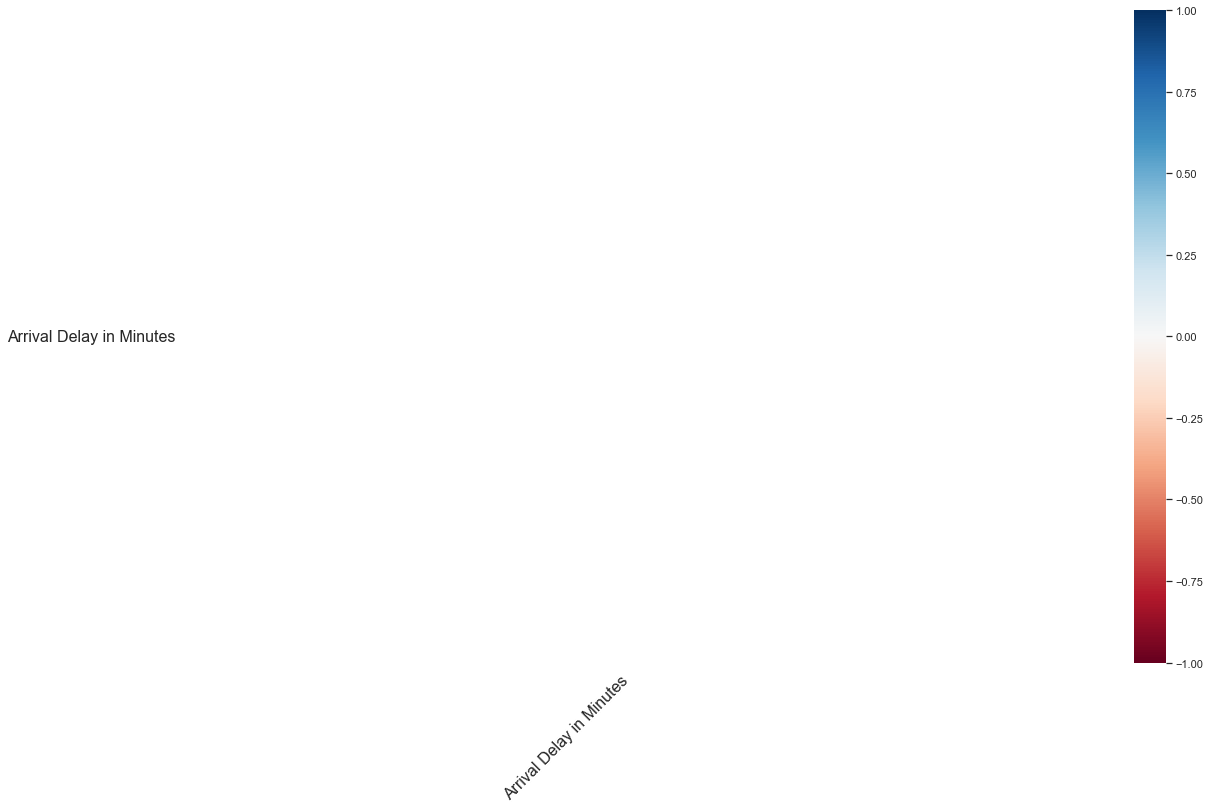

In [23]:
msno.heatmap(df_test);

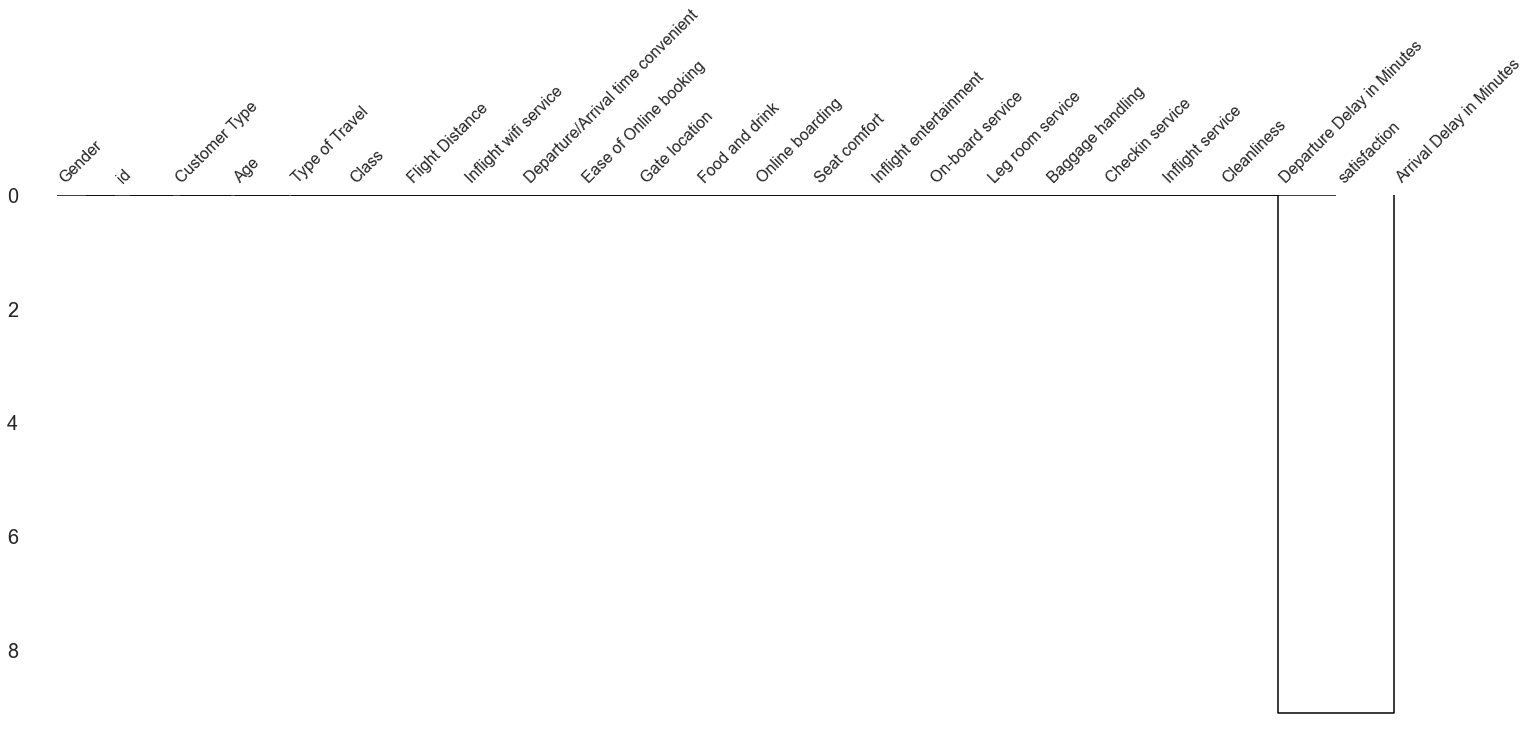

In [24]:
msno.dendrogram(df_test);

In [25]:
# Prepare Test data to imputer
dftest_imputer_num = df_test[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].copy()
dftest_imputer_num = dftest_imputer_num.select_dtypes(include = np.number)

In [26]:
#Knn Imputation
df_testKNN_imputer= knn_imp.transform(dftest_imputer_num)
df_testKNN_imputer = pd.DataFrame(df_testKNN_imputer, columns= dftest_imputer_num.columns)

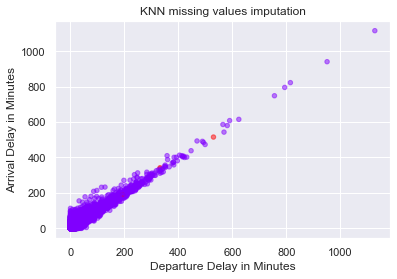

In [27]:
#Plot imputation

nullity = dftest_imputer_num['Arrival Delay in Minutes'].isnull()
df_testKNN_imputer.plot(x = 'Departure Delay in Minutes',y = 'Arrival Delay in Minutes', kind = 'scatter', c = nullity, 
                         cmap = 'rainbow',colorbar = False ,alpha = 0.5, title = 'KNN missing values imputation');

### Transform / Apply Trainig Data

In [29]:
df_cat = df_train.drop([ 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis = 1)

In [30]:
df_train =  df_cat.merge( df_trainKNN_imputer, left_index=True, right_index=True , how='inner')

In [31]:
df_train.shape

(103904, 24)

In [32]:
df_train.id.duplicated().value_counts()

False    103904
Name: id, dtype: int64

### Transform / Apply Test Data

In [33]:
df_test_cat = df_test.drop([ 'Departure Delay in Minutes','Arrival Delay in Minutes'], axis = 1)

In [34]:
df_test =  df_test_cat.merge( df_testKNN_imputer, left_index=True, right_index=True, how='inner')

In [35]:
df_test.shape

(25976, 24)

In [36]:
df_test.id.duplicated().value_counts()

False    25976
Name: id, dtype: int64

### Preparation of the dataset

In [38]:
X = df_train.drop(['id', 'satisfaction'], axis = 1)
y = df_train['satisfaction']

In [39]:
# Split dataset with size 30% and with shuffle to mix the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, shuffle = True)

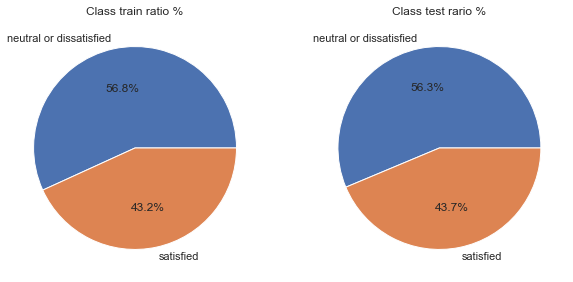

In [40]:
# Balance control of the response variable

fig, (ax1, ax2)  =plt.subplots(1,2, figsize = (10,5), sharey = True)

ax1.pie(y_train.value_counts(normalize = True), labels = ['neutral or dissatisfied', 'satisfied'], autopct= '%.1f%%' );
ax1.set_title('Class train ratio %');


ax2.pie(y_test.value_counts(normalize = True), labels = ['neutral or dissatisfied', 'satisfied'], autopct= '%.1f%%');
ax2.set_title('Class test rario %');



X-train, X_test, y_train and y_test are completely bilanced and shuffled in casual mode before splitting them so as to obtain more representative and real subsets for classification and validation futhermore the causal generation is checked with the random state to obtain the same result for each run.

## Handle Outliers 

### Univariate analysis train data



To visualize outliers the boxplot is the best choose. The columns to check are : 'Age', 'Flight Distance', 'Departure Delay in Minutes' and 'Arrival Delay in Minutes'.

The others columns are all in a range from 0 to 5 hence the qualty degree of the company airplane service.

In [41]:
X.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.245280
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.807628
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


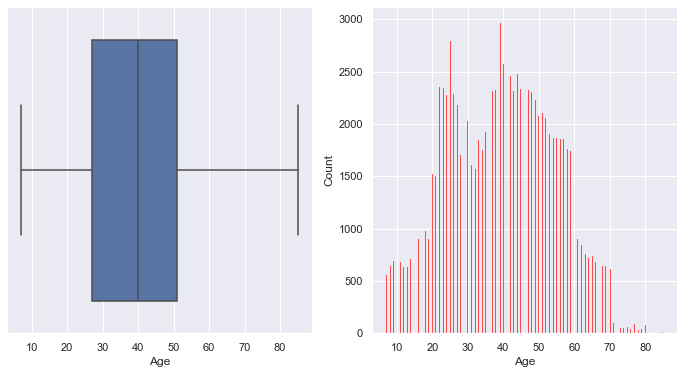

In [42]:
# Box plot and histplot to check precence or not about outliers and distibution of the column

n_bins = int(np.sqrt(len(X['Age'])))


fig, ax =plt.subplots(1,2, figsize = (12,6))
sns.boxplot(x= X['Age'], ax=ax[0])
sns.histplot(x= X['Age'], bins = n_bins, color = 'red' ,ax=ax[1])
plt.show()




Age column has not outliers and bimodal distribution.

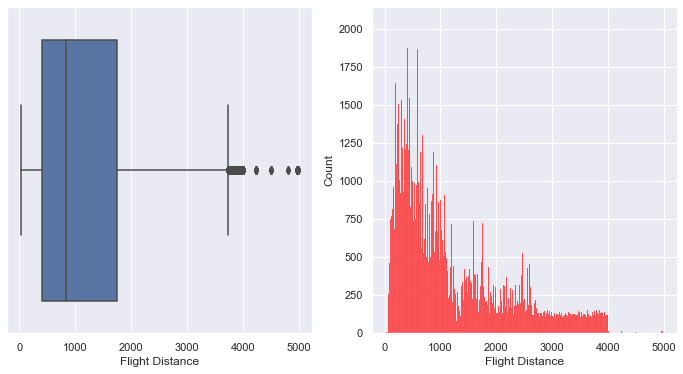

In [43]:
# Box plot and histplot to check precence or not about outliers and distibution of the column

fig, ax =plt.subplots(1,2, figsize = (12,6))
sns.boxplot(x= X['Flight Distance'], ax=ax[0])
sns.histplot(x= X['Flight Distance'], bins = n_bins, color = 'red' ,ax=ax[1])
plt.show()

Flight Distance column has outliers and positive skew

The max value of the Flight Distance is 4983 Nautical Mile that is equal to 9228 km. Lot of airplanes can flight more than this value , distances like 10000-12000 km. For this reason i decided to not delet, transform or impute the ouliers.

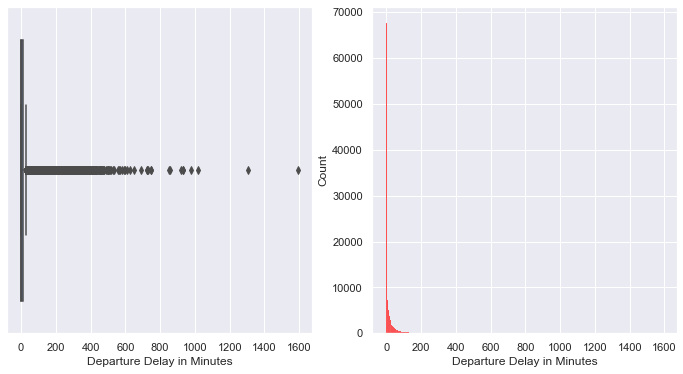

In [44]:
# Box plot and histplot to check precence or not about outliers and distibution of the column
#Departure Delay in Minutes

fig, ax =plt.subplots(1,2, figsize = (12,6))

sns.boxplot(x= X['Departure Delay in Minutes'], ax=ax[0])
sns.histplot(x= X['Departure Delay in Minutes'], bins = n_bins, color = 'red' ,ax=ax[1])
plt.show()

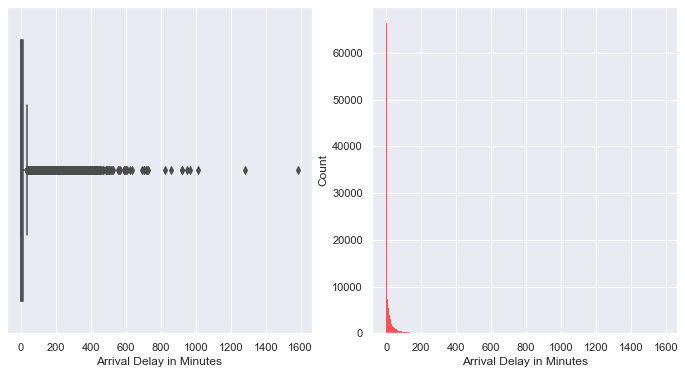

In [45]:
#Arriva Delay in Minutes

fig, ax =plt.subplots(1,2, figsize = (12,6))

sns.boxplot(x= X['Arrival Delay in Minutes'], ax=ax[0])
sns.histplot(x= X['Arrival Delay in Minutes'], bins = n_bins, color = 'red' ,ax=ax[1])
plt.show()

The max values of the Arrival e Departure delay can be real, their respective graphs show real situations where the most common delays are in short range of minutes, like short range of minutes unitl short range of hours hence i decided to not delet or transform outliers.

As the coulmns does not have a normal distribution to detect outliers i am going to use the median absolute deviation (MAD).
Z-score is sensitive to outliers since is computed by average and deviation standard that drastically changes. 
The median is unaffected hence i will change the z-score parameters with the median and MAD


In [46]:
import warnings
warnings.filterwarnings('ignore')


columns = ['Age', 'Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']


for col in columns:
    
    # Compute of the Median Absolute Deviation
    
    mad_score = median_abs_deviation(X[col])
    
    # Threshold defaul to 3.5
    
    mad = MAD(threshold = 3.5)
    
    # reshape df to the algoritm
    
    df_reshape = X[col].values.reshape(-1,1)
    
    #Detect ouliers
    
    label = mad.fit(df_reshape)
    label = mad.predict(df_reshape).sum()

    print(f' "{col}", Median Absolute Deviation: {mad_score}' )
    print(f' "{col}", numbers of outliers: {label}' )
    
    
    
    


 "Age", Median Absolute Deviation: 12.0
 "Age", numbers of outliers: 0
 "Flight Distance", Median Absolute Deviation: 517.0
 "Flight Distance", numbers of outliers: 4042
 "Departure Delay in Minutes", Median Absolute Deviation: 0.0
 "Departure Delay in Minutes", numbers of outliers: 45236
 "Arrival Delay in Minutes", Median Absolute Deviation: 0.0
 "Arrival Delay in Minutes", numbers of outliers: 45745


### Multivariate outliers analysis with  Sklearn Isolation Forest 


Even though i decided to not impute or cut outliers it is important to do a multivariate analisys to undestrand the behavior of the outliers with multiple variables.

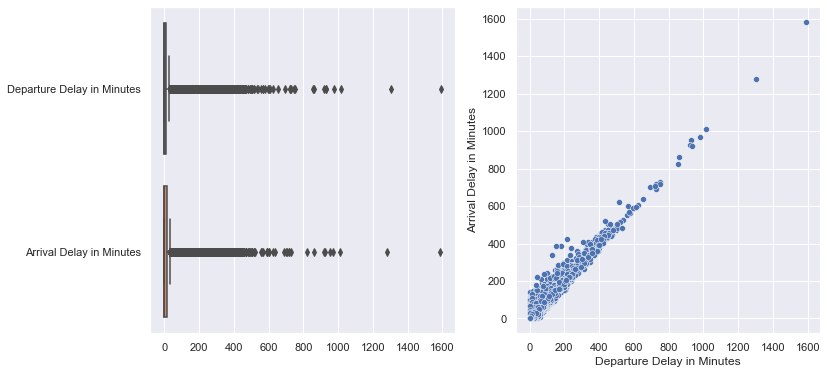

In [47]:
#Scatter plot to show the degree of correlation, in this case strong positive.

fig, ax =plt.subplots(1,2, figsize = (12,6))
sns.boxplot(data = X[['Departure Delay in Minutes', 'Arrival Delay in Minutes']], orient = 'h', ax = ax[0]);
sns.scatterplot(x = X['Departure Delay in Minutes'], y = X['Arrival Delay in Minutes'], ax = ax[1]);

In [48]:
#select numerical columns

X_train_out = X_train.select_dtypes(include = 'number')
X_test_out = X_test.select_dtypes(include = 'number')

In [49]:
#Isolation Forest outlier detection default parameters 
# (1 = inliers, -1 = outliers)

# training the model
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0)
clf.fit(X_train_out)

# predictions
X_train_out["iso_forest_outliers"] = clf.predict(X_train_out)
X_test_out["iso_forest_outliers"] = clf.predict(X_test_out)


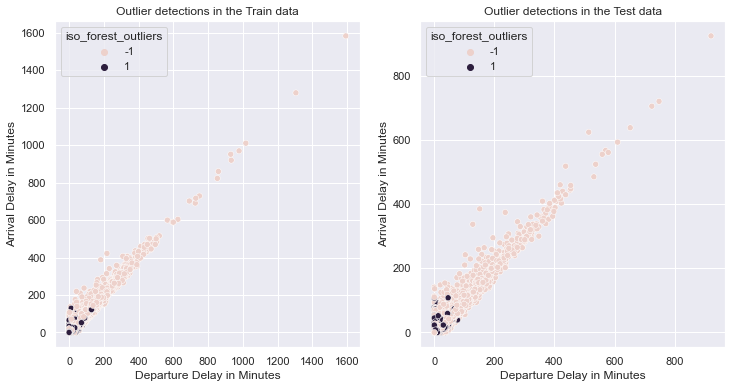

In [50]:
fig, ax =plt.subplots(1,2, figsize = (12,6))

sns.scatterplot( x = X_train_out['Departure Delay in Minutes'], y = X_train_out['Arrival Delay in Minutes'],
                hue = X_train_out["iso_forest_outliers"], ax = ax[0] );
ax[0].set_title('Outlier detections in the Train data');

sns.scatterplot( x = X_test_out['Departure Delay in Minutes'], y = X_test_out['Arrival Delay in Minutes'],
                hue = X_test_out["iso_forest_outliers"], ax = ax[1] );
ax[1].set_title('Outlier detections in the Test data');


Isolation Forest it is an unsupervised classification. For this reason we can not evaluate the performance without supervised classifications. 
One soultion is fit and predict the X with the Isolation Forest and put the inliers in a SVC model and with the different parameters inside Isolation Forest tuning contamination, max_features, max_samples, n_estimator and check the best accuracy.

However since i decided not to remove the outliers i dwelt in a simple exploratory analysis with the default parameters.

## Data visualization and feature engineering

### Univariate and multivariate analysis

#### Check columns distribution and analysis with the target variable

In [52]:
# Satisfaction degree with costumer gender and their ages

round(df_train.groupby(['satisfaction', 'Gender'])['Age'].mean(), 0)

satisfaction             Gender
neutral or dissatisfied  Female    37.0
                         Male      38.0
satisfied                Female    42.0
                         Male      42.0
Name: Age, dtype: float64

satisfied customers are slightly older

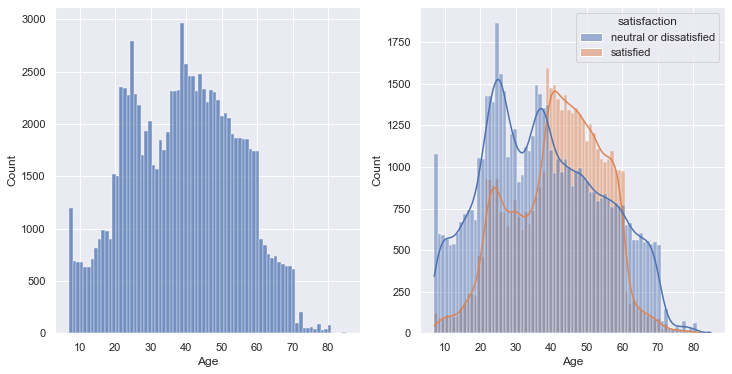

In [53]:
#Plot Age distibution 

fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.histplot(x = df_train['Age'], ax = ax[0]);
sns.histplot(x = df_train['Age'], hue = df_train['satisfaction'], kde = True, ax = ax[1]);

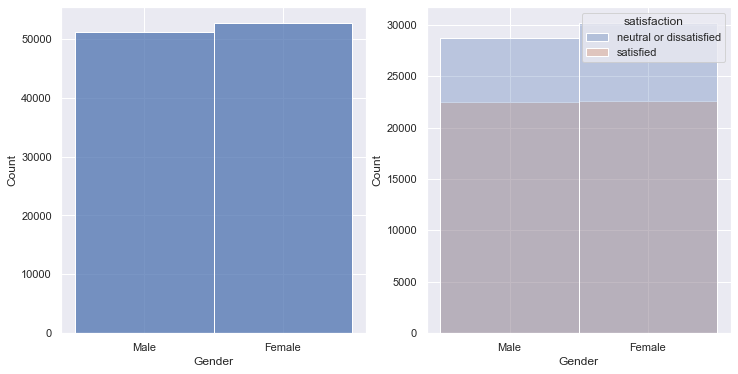

In [54]:
#Plot Gender distibution 

fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.histplot( x = df_train['Gender'], ax=ax[0])
sns.histplot(x = df_train['Gender'], hue = df_train['satisfaction'], ax = ax[1], alpha = 0.3);

People satisfied are less than people neutral or dissatisfied and female gender is slightly more than male gender.

In [55]:
# Class analysis

df_train['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

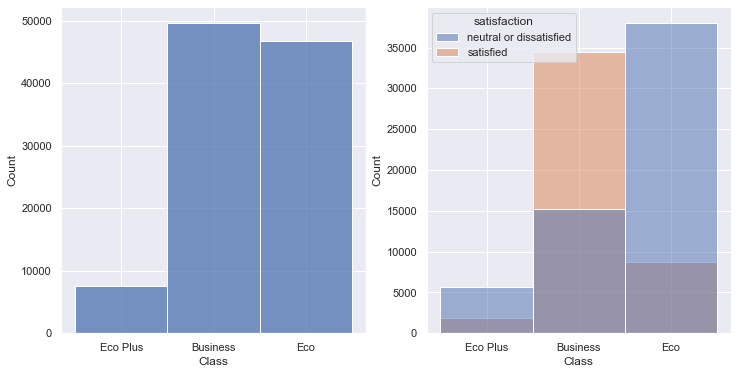

In [56]:
#Plot Class distributtion

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(x = df_train['Class'], ax = ax[0])
sns.histplot(x = df_train['Class'], hue = df_train['satisfaction'], ax = ax[1]);

Costumers use to flight more in the Business Class follow by Economic Class and Eco Plus.


In [57]:
#Ratio Class for total costumers

ratio_class = round(df_train['Class'].value_counts(normalize = True)*100 ,0)
ratio_class

Business    48.0
Eco         45.0
Eco Plus     7.0
Name: Class, dtype: float64

48% of the costumers in Business Class, 45% in Economic Class and 7% in Economic Plus

<AxesSubplot:ylabel='Class,satisfaction'>

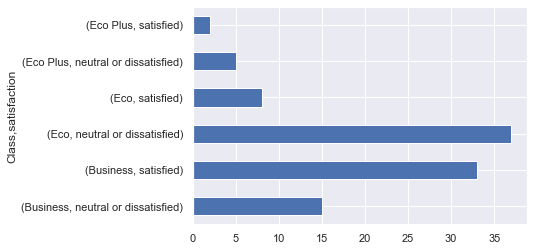

In [58]:
#Plot ratio satisfaction for classes

ratio_typeclass = round(df_train[['Class', 'satisfaction']].value_counts(sort = False, normalize = True)*100, 0)
ratio_typeclass.plot(kind = 'barh')


In [59]:
ratio_typeclass

Class     satisfaction           
Business  neutral or dissatisfied    15.0
          satisfied                  33.0
Eco       neutral or dissatisfied    37.0
          satisfied                   8.0
Eco Plus  neutral or dissatisfied     5.0
          satisfied                   2.0
dtype: float64

1) 48% of customers use to travel in Business Class where 33% are satisfied and 15 % are neutral or dissatisfied.

2) 45% of customers use to travel in Eco Class where 8 % are satisfied and 37 % are neutral or dissatisfied.

3) 7% of customers use to travel in Eco Plus Class where 2 % are satisfied and 5 % are neutral or dissatisfied.

In [60]:
df_train[['Class', 'satisfaction']].value_counts(sort = False)

Class     satisfaction           
Business  neutral or dissatisfied    15185
          satisfied                  34480
Eco       neutral or dissatisfied    38044
          satisfied                   8701
Eco Plus  neutral or dissatisfied     5650
          satisfied                   1844
dtype: int64

In [61]:
# Satisfaction index

satisfied = np.array([34480,8701,1844])
dissatisfied = np.array([15185,38044,5650])

satisfied_index = satisfied / dissatisfied *100
satisfied_index = np.round(satisfied_index, 0)
satisfied_index = satisfied_index.astype(int)
columns = ['Business Class', 'Eco Class',' Eco PLus Class']
for i , col in zip(satisfied_index, columns):

    print(f'The satisfaction index tells us that for every  100 dissatisfied people who traveling in {col}, {i} will be satisfied')

The satisfaction index tells us that for every  100 dissatisfied people who traveling in Business Class, 227 will be satisfied
The satisfaction index tells us that for every  100 dissatisfied people who traveling in Eco Class, 23 will be satisfied
The satisfaction index tells us that for every  100 dissatisfied people who traveling in  Eco PLus Class, 33 will be satisfied


In [62]:
# Probablity of a satisfaction costumer for for Class 

satisfied = np.array([34480,8701,1844])

total = satisfied + dissatisfied

Prob_s= np.round(satisfied / total *100, 2)

for i , col in zip(Prob_s, columns):

    print(f'The probability of having a satisfied customer for {col} is: {i}%')


The probability of having a satisfied customer for Business Class is: 69.43%
The probability of having a satisfied customer for Eco Class is: 18.61%
The probability of having a satisfied customer for  Eco PLus Class is: 24.61%


Text(0.5, 1.0, 'Probability of a customer being satisfied for class "(%)" ')

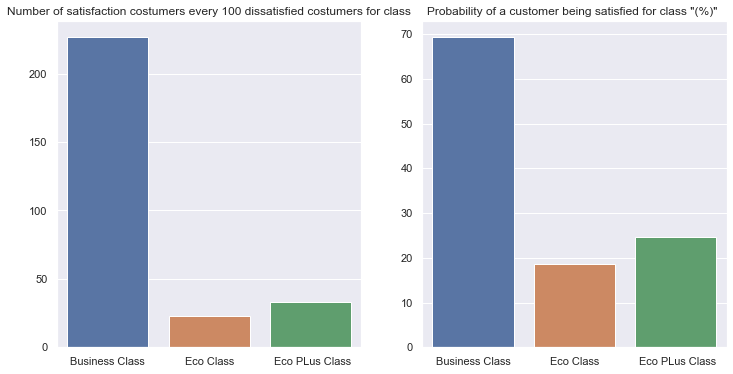

In [63]:
#Plot satisfaction index and satistaction costumer probability

fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.barplot(x = columns, y = satisfied_index, ax = ax[0])
ax[0].set_title('Number of satisfaction costumers every 100 dissatisfied costumers for class');

sns.barplot(x = columns, y = Prob_s, ax = ax[1])
ax[1].set_title('Probability of a customer being satisfied for class "(%)" ');

In [64]:
#Quality service analysis for class

class_quality_service = round(df_train.groupby('Class')['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'].mean(), 1)

class_quality_service 

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.8,2.9,2.9,3.0,3.3,3.7,3.8,3.6,3.7,3.6,3.8,3.5,3.8,3.5
Eco,2.7,3.2,2.6,3.0,3.1,2.8,3.1,3.1,3.1,3.1,3.5,3.1,3.5,3.1
Eco Plus,2.8,3.2,2.7,3.0,3.1,2.9,3.2,3.1,3.0,3.1,3.4,3.0,3.4,3.1


Business Class on average has a higher service quality appreciation score while between Eco and Eco Plus there is no significant evidence.

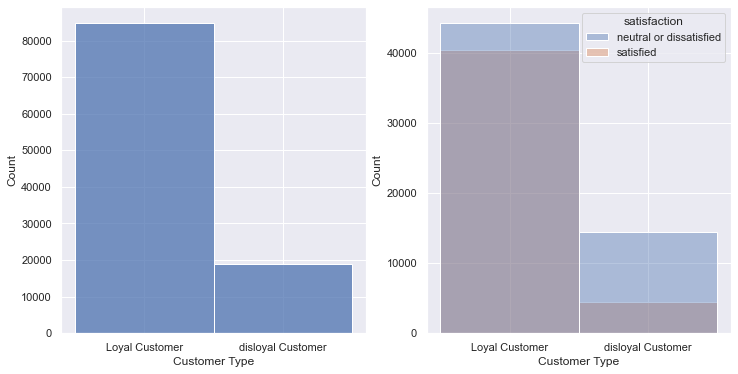

In [66]:
#Plot Customer Type

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(x = df_train['Customer Type'], ax = ax[0])
sns.histplot(x = df_train['Customer Type'], hue = df_train['satisfaction'],alpha = 0.4, ax = ax[1]);

In [67]:
# # Satisfaction degree with costumer type and their ages

round(df_train.groupby(['Customer Type', 'satisfaction'])['Age'].mean(), 0)

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    40.0
                   satisfied                  43.0
disloyal Customer  neutral or dissatisfied    31.0
                   satisfied                  28.0
Name: Age, dtype: float64

Loyal costumer have a moree degree of satistaction respect Disloyal costumers and in average loyal costumers are older than disloyal costumers

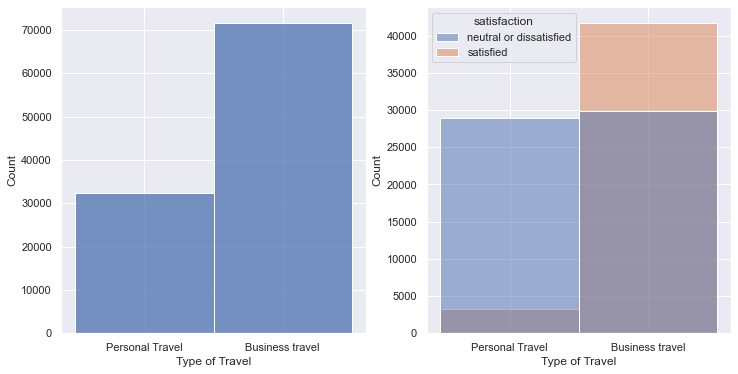

In [68]:
#Plot Business travel with satisfaction degree

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(x = df_train['Type of Travel'], ax = ax[0])
sns.histplot(x = df_train['Type of Travel'], hue = df_train['satisfaction'], ax = ax[1]);

Business travel are more than personal travel, loyal costumers are more than disloyal costumers and the degree of satisfaction more bigger.

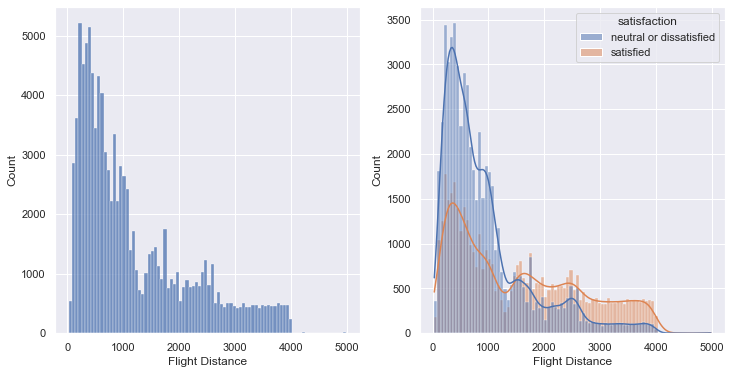

In [69]:
#Plot Flight Distance with satisfaction degree

fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.histplot(x = df_train['Flight Distance'], ax = ax[0])
sns.histplot(x = df_train['Flight Distance'], hue = df_train['satisfaction'], kde = True, ax = ax[1]);



In [70]:
#Quality services analysis

quality_service = df_train[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

<Figure size 432x288 with 0 Axes>

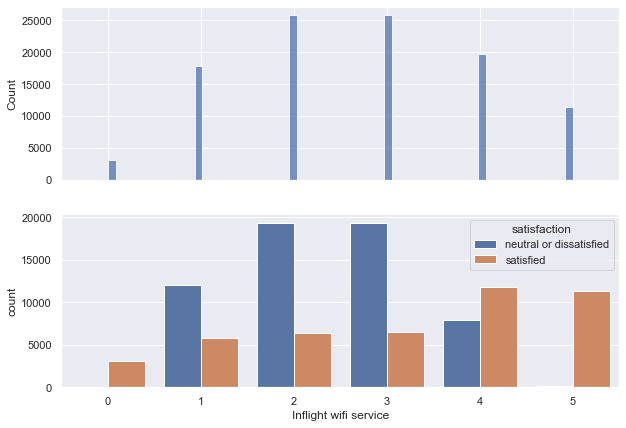

<Figure size 720x504 with 0 Axes>

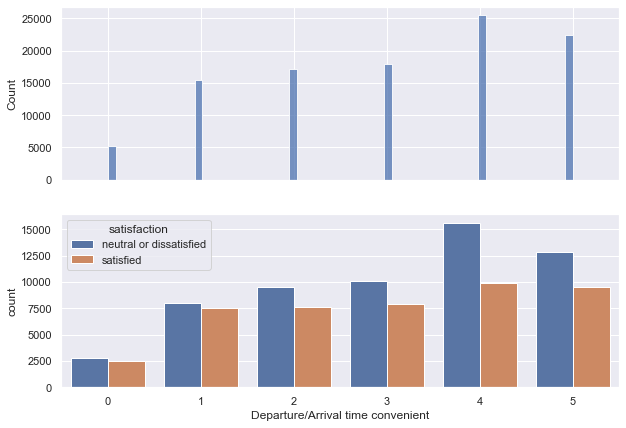

<Figure size 720x504 with 0 Axes>

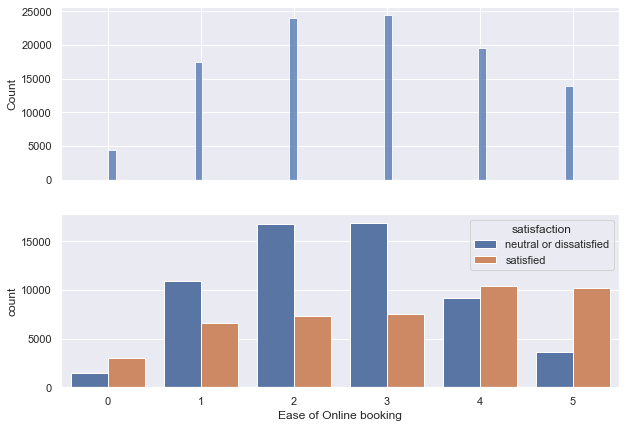

<Figure size 720x504 with 0 Axes>

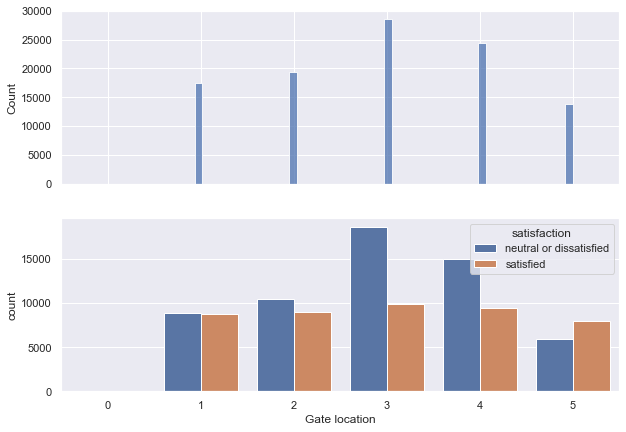

<Figure size 720x504 with 0 Axes>

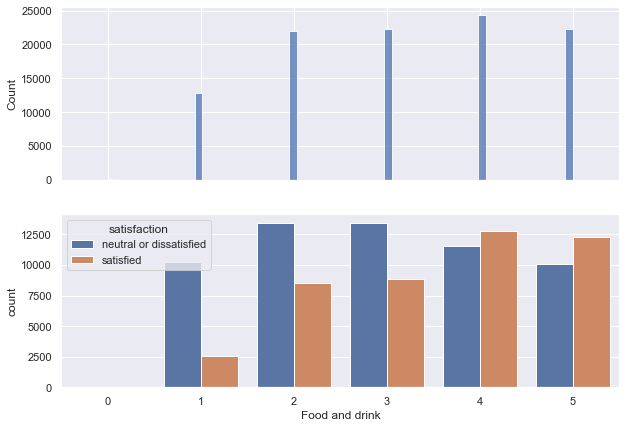

<Figure size 720x504 with 0 Axes>

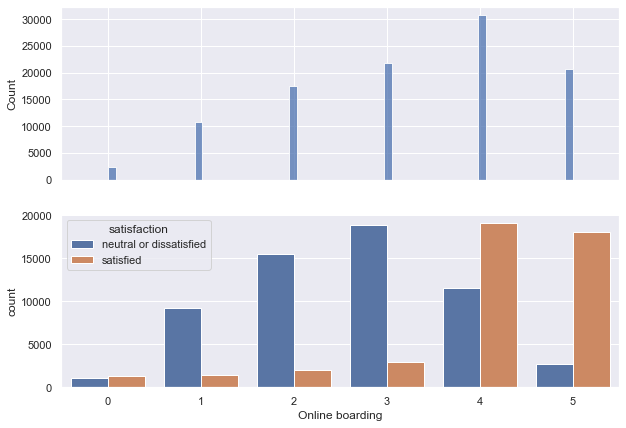

<Figure size 720x504 with 0 Axes>

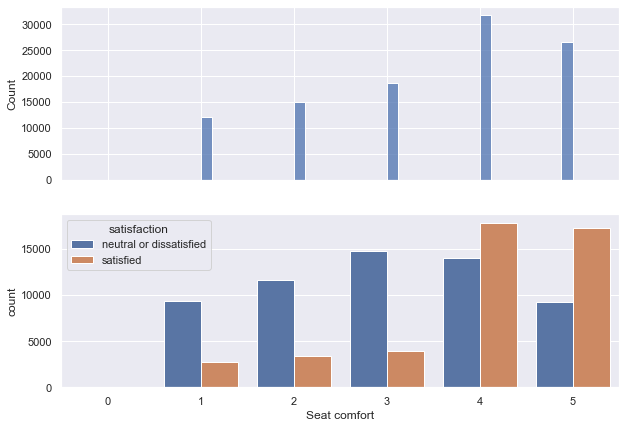

<Figure size 720x504 with 0 Axes>

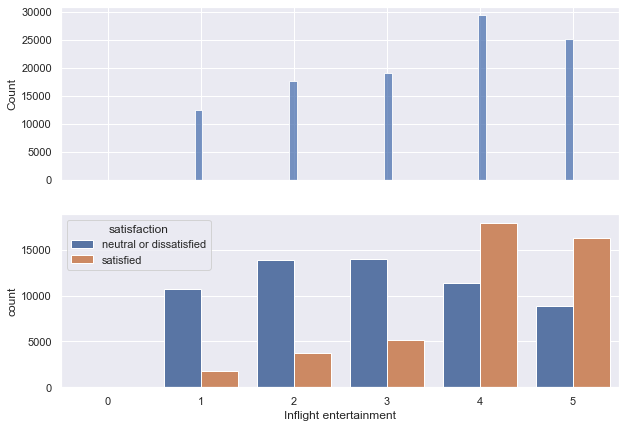

<Figure size 720x504 with 0 Axes>

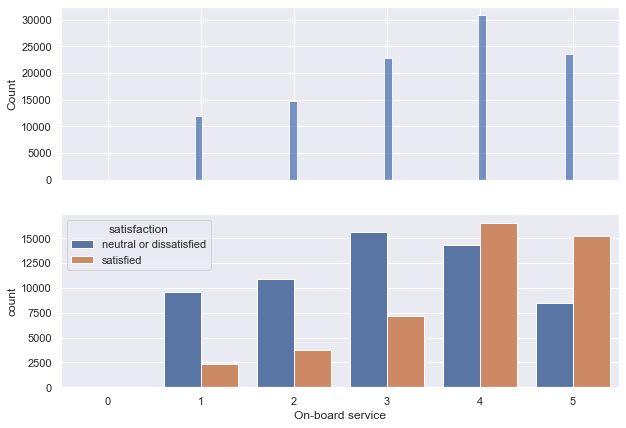

<Figure size 720x504 with 0 Axes>

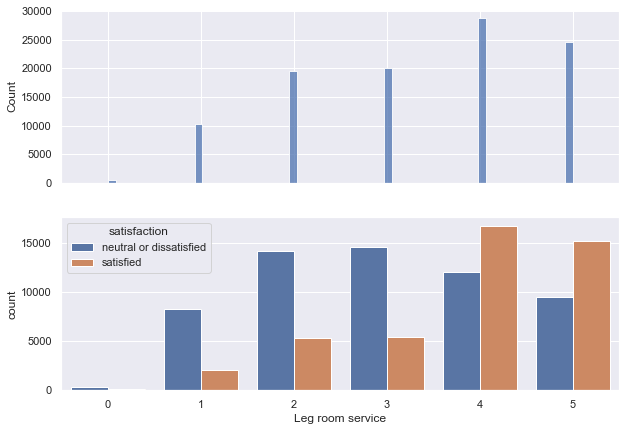

<Figure size 720x504 with 0 Axes>

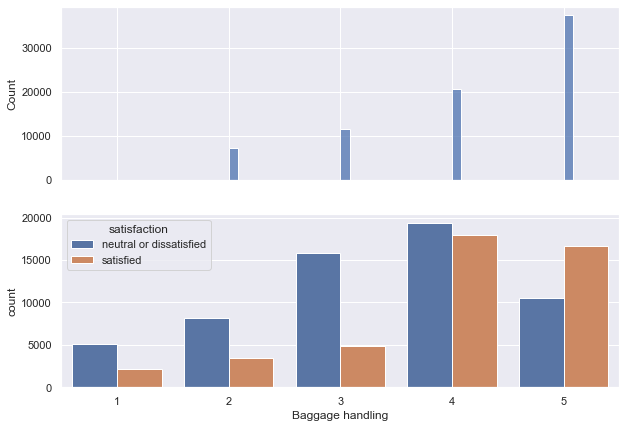

<Figure size 720x504 with 0 Axes>

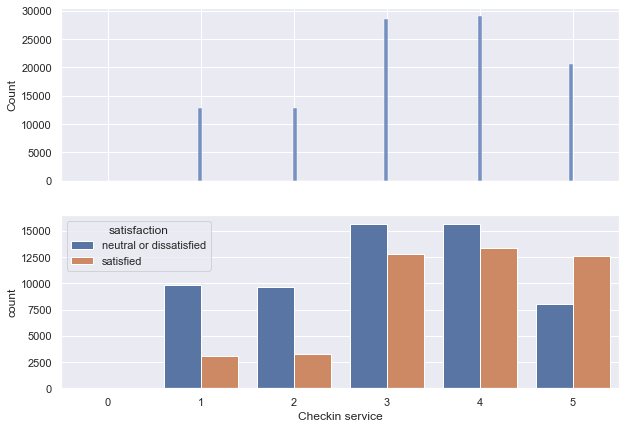

<Figure size 720x504 with 0 Axes>

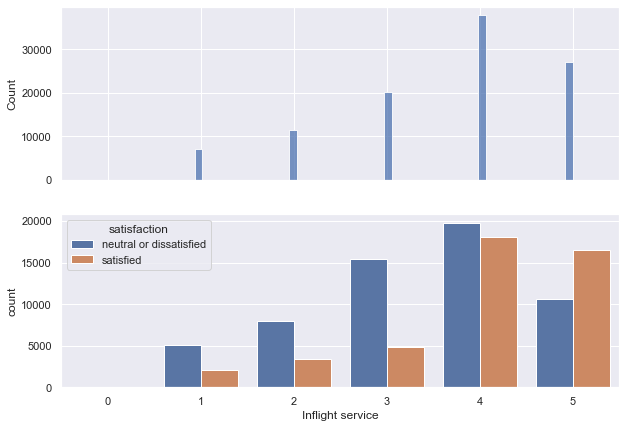

<Figure size 720x504 with 0 Axes>

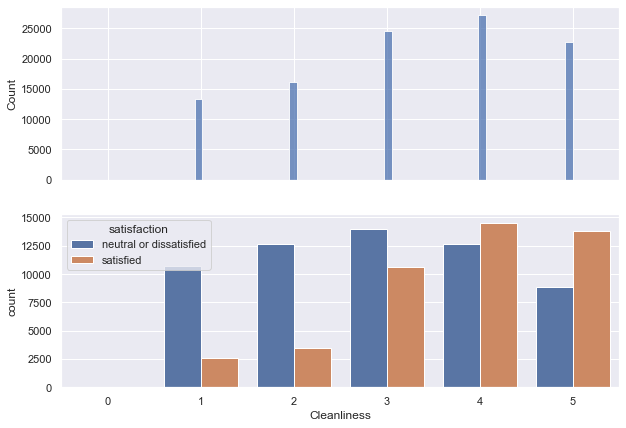

In [71]:
#Plot Quality services with satisfaction degree

for i in quality_service.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 7)})
    f, (ax_hist, ax_count) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.histplot(quality_service[i], ax=ax_hist);
    sns.countplot(quality_service[i], hue = df_train['satisfaction'] ,ax=ax_count);

In [72]:
#Check target variable

ratio_target = round(df_train[['satisfaction']].value_counts(normalize = True)*100,0)
ratio_target

satisfaction           
neutral or dissatisfied    57.0
satisfied                  43.0
dtype: float64

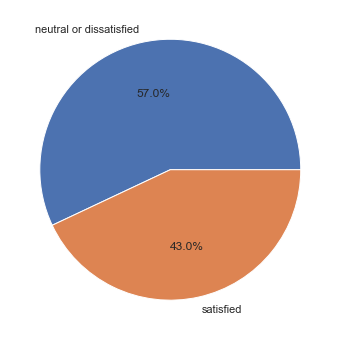

In [73]:
#Plot target variable

fig = plt.subplots(figsize = (12,6))

plt.pie(ratio_target, labels = ['neutral or dissatisfied', 'satisfied'], autopct= '%.1f%%');

The target variable is well balanced and can be used for forecast models. 

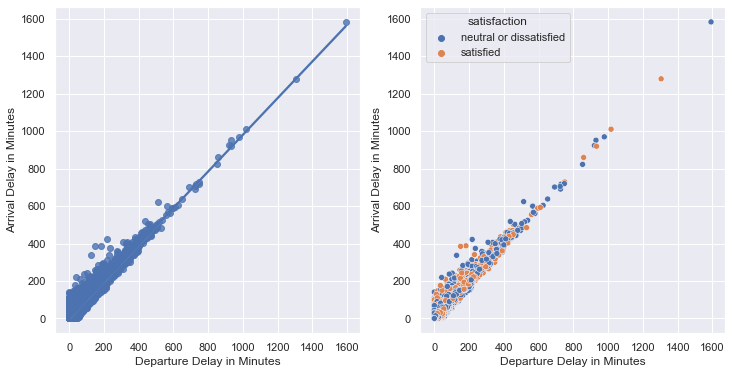

In [74]:
#Scatter plot Departure and Arrival Delay in minutes

fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.regplot(x = df_train['Departure Delay in Minutes'],y= df_train['Arrival Delay in Minutes'], ax= ax[0]);
sns.scatterplot(x = df_train['Departure Delay in Minutes'],y= df_train['Arrival Delay in Minutes'], hue = df_train['satisfaction'], ax= ax[1]);

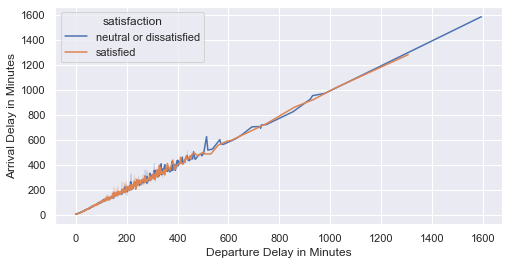

In [75]:
#Line plot Departure and Arrival Delay in minutes

fig = plt.subplots(1,1, figsize = (8,4))

sns.lineplot(x = df_train['Departure Delay in Minutes'],y= df_train['Arrival Delay in Minutes'], hue = df_train['satisfaction']);

There are a strong correlation about the two columns and more delay equal more neutral or dissatisfied costumers

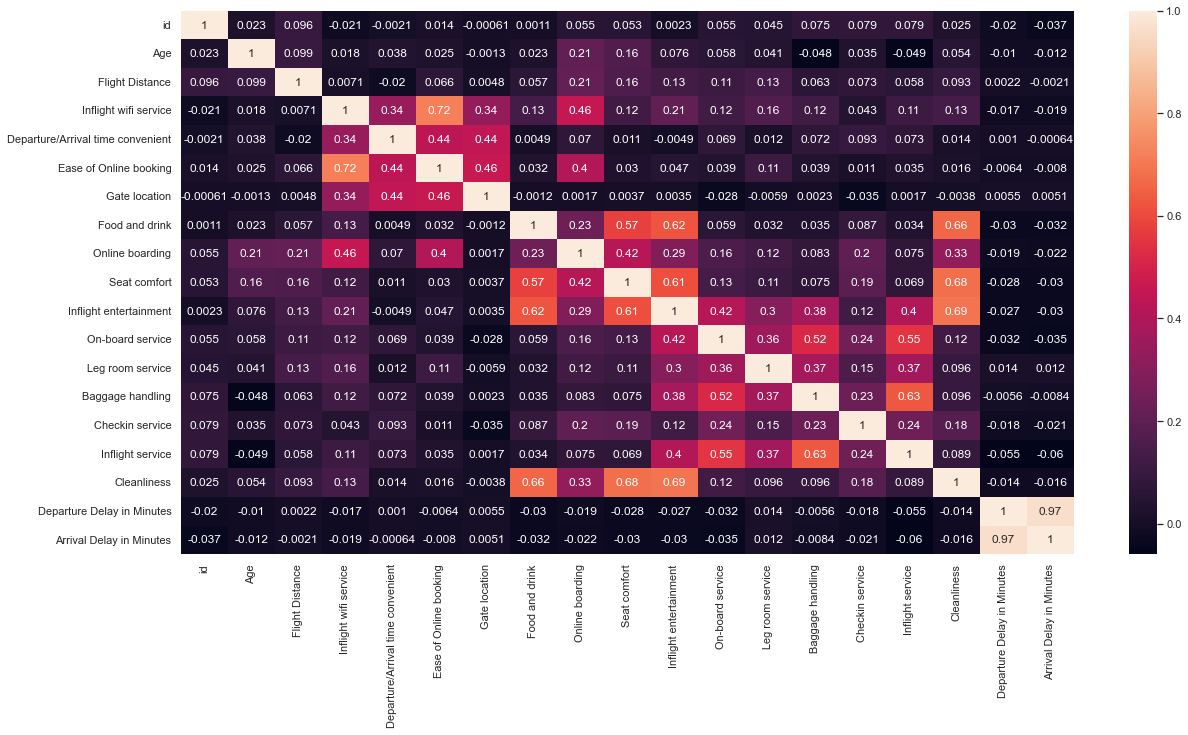

In [76]:
#Plot correlation map

fig = plt.subplots(1,1, sharex = True, figsize = (20,10))
sns.heatmap(df_train.corr(), annot = True);

It is useful as it is possible understand the degree of correlation beetween the  columns, however for a feature selection we need understand which columns are correlated with the target variable and drops columns with strong correlation each other because one is enough for the target informartion.

## Label Encoder

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [78]:
#Define columns

colums_X = ['Class','Gender', 'Customer Type', 'Type of Travel','Age',
        'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',]

In [79]:
#The label transformer is created 

ct = ColumnTransformer(
     # Transformer name, Transformer Object and columns
    [("Oridnal encoder", OrdinalEncoder(categories = [['Eco', 'Eco Plus', 'Business']]), ["Class"]),
     ("Ord_encoder", OrdinalEncoder(), ['Gender', 'Customer Type', 'Type of Travel'])
    ],
    # Any other columns are ignored
    remainder="passthrough"
  )

In [80]:
#X_train_encoded

X_train = ct.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = colums_X )

In [81]:
#X_test_encoded

X_test = ct.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = colums_X )

In [82]:
#y_test and train encoded

encoder = LabelEncoder()
y_train = pd.DataFrame(encoder.fit_transform(y_train), columns = ['satisfaction'])
y_test  = pd.DataFrame(encoder.fit_transform(y_test), columns = ['satisfaction'])

In [83]:
# Make the valid set for the final estimator

X_valid = df_test.drop(['id','satisfaction'], axis = 1)
y_valid = df_test['satisfaction']

In [84]:
# X_test_encoded

X_valid = ct.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid, columns = colums_X )

In [85]:
# y_valid_encoded

y_valid  = pd.DataFrame(encoder.fit_transform(y_valid), columns = ['satisfaction'])

## Feature Selection

### Chi-square test for categorical variables

Chi-square is a good method to compare categorical features with the categorical target variable and understand the dipendece degree.

In [86]:
#1) Ho = two variables are indipendent , H1 = Two variables are not indipendent

from sklearn.feature_selection import chi2

In [87]:
X_train_cat = X_train[['Class', 'Gender', 'Customer Type', 'Type of Travel']]

In [88]:
chi_scores = chi2(X_train_cat, y_train)

# The first array represents chi square values,  and second array represnts p-values
chi_scores

(array([1.61524618e+04, 5.46524731e+00, 2.10363505e+03, 1.01111722e+04]),
 array([0.        , 0.01939831, 0.        , 0.        ]))

In [89]:
p_values = pd.Series(chi_scores[1],index = X_train_cat.columns)
p_values.sort_values(ascending = False , inplace = True)

In [90]:
round(p_values, 3)

Gender            0.019
Class             0.000
Customer Type     0.000
Type of Travel    0.000
dtype: float64

<AxesSubplot:>

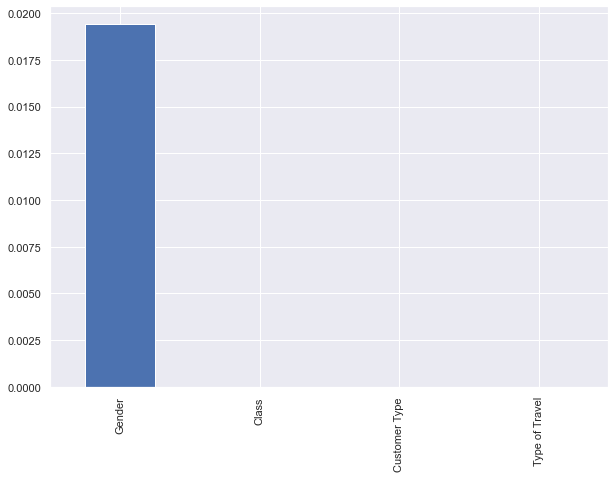

In [91]:
p_values.plot.bar()

Since Gender has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training, H1 hypotesis for gender. The other vairables are dipendets of the target vaiable, the null hypotesis is true

###  Pipeline RFE  with Decision Tree and model prediction

####  Select best number of feature , fit the model and predict

In [95]:
#Create iterator
n_feature = [5, 7, 10, 13, 15, 18]

# create pipeline
for i in n_feature:
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select= i)
    model = DecisionTreeClassifier()
    pipeline = Pipeline(steps=[('r',rfe),('m',model)])
    # evaluate model
    cv = KFold(n_splits= 10 , shuffle=True ,random_state=1)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    
    # report performance
    print(f'Accuracy with {i} columns: {np.round(n_scores.mean(), 2)}' )


Accuracy with 5 columns: 0.85
Accuracy with 7 columns: 0.91
Accuracy with 10 columns: 0.93
Accuracy with 13 columns: 0.94
Accuracy with 15 columns: 0.94
Accuracy with 18 columns: 0.95


In [96]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('r',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=18)),
                ('m', DecisionTreeClassifier())])

In [99]:
#Predict test data

y_pred_ = pipeline.predict(X_test)
print(classification_report(y_test, y_pred_, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.95      0.95      0.95     17555
           satisfied       0.94      0.94      0.94     13617

            accuracy                           0.95     31172
           macro avg       0.95      0.95      0.95     31172
        weighted avg       0.95      0.95      0.95     31172



In [101]:
#Predict validation data 

ypred = pipeline.predict(X_valid)
print(classification_report(y_valid, ypred, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.95      0.95      0.95     14573
           satisfied       0.94      0.94      0.94     11403

            accuracy                           0.95     25976
           macro avg       0.95      0.95      0.95     25976
        weighted avg       0.95      0.95      0.95     25976



In [103]:
# Selected (i.e., estimated best) features are assigned rank 1.

rank_df = pd.DataFrame(rfe.ranking_,index=X_train.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rank_df.head(5) 

,Rank
Class,1
Cleanliness,1
Inflight service,1
Checkin service,1
Baggage handling,1


RFE use an estimator to compute the degree of significance among the variabels in function of the response variable.
I decided to use Decison Classifier as estimator in this case since a decision tree is fast and operates easily on large data sets, especially the linear one.
Quality services are very significant.

### RFEVC

#### Instead of RFE , RFVC automatically creates the best number of features

In [131]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

#define estimator
rfc = RandomForestClassifier()

#cross validation to reduce overfitting
cv = KFold(n_splits=5)

rfecv = RFECV(
    estimator=rfc,
    step=1,                     
    cv=cv,
    scoring="accuracy",
    min_features_to_select= 1,
    n_jobs= -1,                  #use all processor
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 17


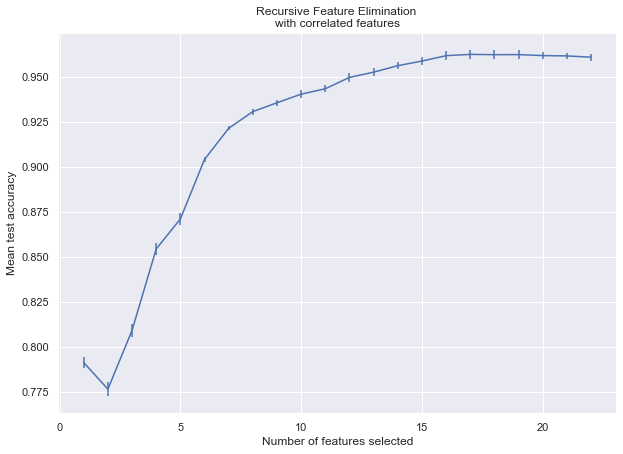

In [105]:
# Plot the accuracy of each n.of features

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [132]:
# Evaluate model with test set

y_pred = rfecv.predict(X_test)
print(classification_report(y_test, y_pred_, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.95      0.95      0.95     17555
           satisfied       0.94      0.94      0.94     13617

            accuracy                           0.95     31172
           macro avg       0.95      0.95      0.95     31172
        weighted avg       0.95      0.95      0.95     31172



1) Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive, 95% and 94% of precision means that the model is well balanced in the correctly way to predict true positive.

2) Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).

3) F1 is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, even here the values are good.

It is important to note that the model seem to predict better neutral or dissatified costumers.

In [133]:
# Test on a new database to check the validation and the overfitting

ypred = rfecv.predict(X_valid)
print(classification_report(y_valid, ypred, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.96      0.98      0.97     14573
           satisfied       0.97      0.94      0.96     11403

            accuracy                           0.96     25976
           macro avg       0.96      0.96      0.96     25976
        weighted avg       0.96      0.96      0.96     25976



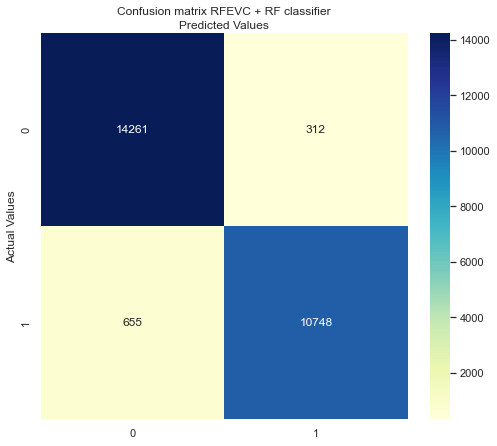

In [112]:
# Confusion matrix valid data
cm = confusion_matrix(y_valid, ypred)
cm = pd.DataFrame(cm)
#plot confusion matrix
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot = True,cmap="YlGnBu", fmt='g');
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RFEVC + RF classifier');
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');
tick_marks = [0.5, 1.5]

The values of true positive and true negative are good although  the model is better able to predict  neutral or dissatisfied costumers.

### Information Gain

I decided to use Information Gain since it is a very good approach to compare numerical and categorical variables with the target because the entropy calculation under the condition of the target variable allows to discover how many variables are impure, clean under the dependece to the response variable, as well as is fast and neutral, which means the solution can be applied to various kinds of ML models and works better with random forest classifications.

<AxesSubplot:>

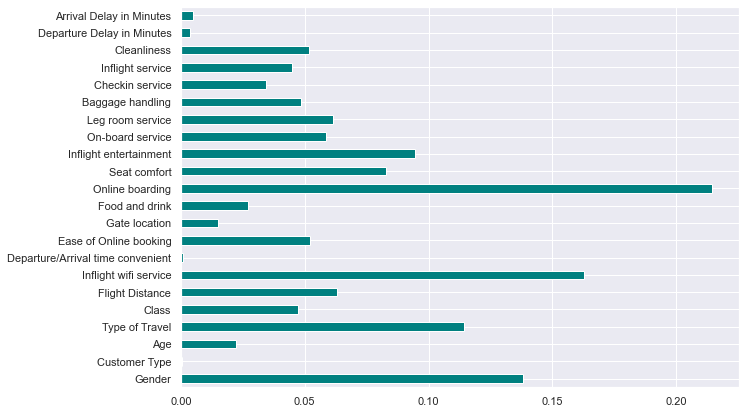

In [97]:
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X_train, y_train)
feat_importance = pd.Series(importance, index = X.columns)
feat_importance.plot(kind='barh', color='teal')

This method calculates mutual information value for each of independent variables with respect to dependent variable, and selects the ones which has most information gain.
The barplot show the most variables witch have the most information with the response variable hence are the most correlation with them.

## Model prediction

## Random Forest Classifier

### RFEVC + Estimator + Hyperparameter tuning

In [128]:
#Define Random Forest Classifier

rfc = RandomForestClassifier()


#Define parameters

parameters = [{
    'n_estimators': [70,100,125],
    'min_samples_split' : [2,5,7],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],

}]


# Define Gridsearch to find the best parameters for the estimator

grid = GridSearchCV(rfc, parameters, cv = 10, scoring='accuracy', ,n_jobs = -1)

#Fit the model

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 7],
                          'n_estimators': [70, 100, 125]}],
             scoring='accuracy')

In [138]:
# Best parameters from the input

grid.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 125}

In [139]:
# Evaluate the model with the best features, RFECV so that it is possible to avoid overfittng

rfecv = RFECV(
    estimator= RandomForestClassifier(n_estimators=125, min_samples_leaf = 1, min_samples_split = 2) ,
    step=1,
    cv= 5,
    scoring="accuracy",
    min_features_to_select= 1,
    n_jobs= -1,
)


# Fit the model
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 17


In [141]:
# Predict with the test data
 
ypred_test_rfecv = rfecv.predict(X_test)
print(classification_report(y_test, ypred_test_rfecv, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.95      0.98      0.97     17555
           satisfied       0.98      0.94      0.96     13617

            accuracy                           0.96     31172
           macro avg       0.97      0.96      0.96     31172
        weighted avg       0.96      0.96      0.96     31172



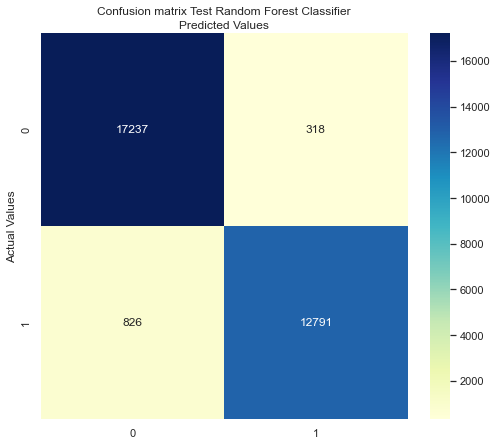

In [142]:
# Confusion matrix test

cm = confusion_matrix(y_test, ypred_test_rfecv)
cm = pd.DataFrame(cm)


#plot confusion matrix

fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot = True,cmap="YlGnBu", fmt='g');
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Test Random Forest Classifier');
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');
tick_marks = [0.5, 1.5]

In [143]:
# Test on a new database to check the validation and overfitting

ypred_valid_rfecv = rfecv.predict(X_valid)
print(classification_report(y_valid, ypred_valid_rfecv, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.96      0.98      0.97     14573
           satisfied       0.97      0.94      0.96     11403

            accuracy                           0.96     25976
           macro avg       0.96      0.96      0.96     25976
        weighted avg       0.96      0.96      0.96     25976



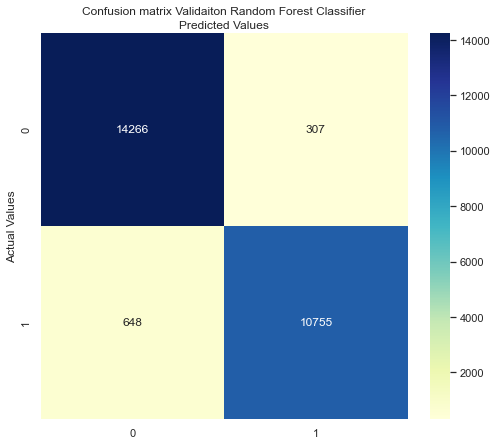

In [144]:
# Confusion matrix valid test
cm = confusion_matrix(y_valid, ypred_valid_rfecv)
cm = pd.DataFrame(cm)
#plot confusion matrix
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot = True,cmap="YlGnBu", fmt='g');
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Validaiton Random Forest Classifier');
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');
tick_marks = [0.5, 1.5]

Unlike the "decision classifier, " the model better predicted true positives and negatives and consequently reduced false positives and nagatives. This is due both to the random forest being an ensemble method and to the fact that 'hyper parameter tuning' was opted for

## XGBoost Classifier

XGBoost is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed. With XGBoost, trees are built in parallel, instead of sequentially like GBDT. It follows a level-wise strategy, scanning across gradient values and using these partial sums to evaluate the quality of splits at every possible split in the training set.

In [151]:
# Define the model
xgb_cl = xgb.XGBClassifier()


# Define the parameters
parameters = [{
    'max_depth': [3,6,9],            #default = 6
    'n_estimators': [100,125,150],
    'eta':[0.1,0.3,0.5,0.7],         #step size at each iteration. The value must be between 0 and 1 
    'subsample': [0.2,0.5,0.7,1]     #represents the fraction of observations that need to be sampled for each tree. A lower value helps to prevent overfitting
}]

# Define cross validation arguments with K-Fold
cv = KFold(n_splits= 10, shuffle=True, random_state= 42)


# Define GridSearchCV arguments

grid_gboost = GridSearchCV(xgb_cl, parameters, scoring= 'accuracy', refit= True, n_jobs=-1, cv=cv) 

# Fit the model

grid_gboost.fit(X_train,y_train)

# Check best parameters

grid_gboost.best_params_

{'eta': 0.1, 'max_depth': 9, 'n_estimators': 150, 'subsample': 1}

In [154]:
# Define estimator

estimator = xgb.XGBClassifier(eta = 0.1, max_depth = 9, n_estimators = 150, subsample = 1)


# Define RFECV with the best GXBoost parameters as estimator

rfecv = RFECV(estimator = estimator, step=1, cv = 10, scoring = 'accuracy',  min_features_to_select= 1,n_jobs= -1,)


# Fit RFECV

rfecv.fit(X_train, y_train)


print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 17


In [165]:
# Show ranking

rank_gboost = pd.DataFrame(rfecv.ranking_, index=X_train.columns, columns=['Rank']).sort_values(by='Rank',ascending=True)
rank_gboost.head()

,Rank
Class,1
On-board service,1
Inflight entertainment,1
Seat comfort,1
Online boarding,1


In [160]:
# Prediction with the test data

xboost_test_pred = rfecv.predict(X_test)
print(classification_report(y_test, xboost_test_pred, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.96      0.98      0.97     17555
           satisfied       0.97      0.94      0.96     13617

            accuracy                           0.96     31172
           macro avg       0.96      0.96      0.96     31172
        weighted avg       0.96      0.96      0.96     31172



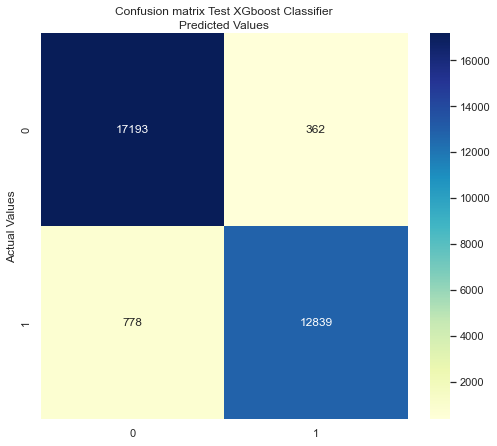

In [161]:
# Confusion matrix test

cm = confusion_matrix(y_test, xboost_test_pred)
cm = pd.DataFrame(cm)


#Plot confusion matrix
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot = True,cmap="YlGnBu", fmt='g');
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Test XGboost Classifier');
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');
tick_marks = [0.5, 1.5]

In [163]:
# Prediciton on a new database to check the validation and overfitting

xboost_valid_pred = rfecv.predict(X_valid)
print(classification_report(y_valid, xboost_valid_pred, target_names= ['neutral /dissatified', 'satisfied']))

                      precision    recall  f1-score   support

neutral /dissatified       0.96      0.98      0.97     14573
           satisfied       0.97      0.94      0.96     11403

            accuracy                           0.96     25976
           macro avg       0.96      0.96      0.96     25976
        weighted avg       0.96      0.96      0.96     25976



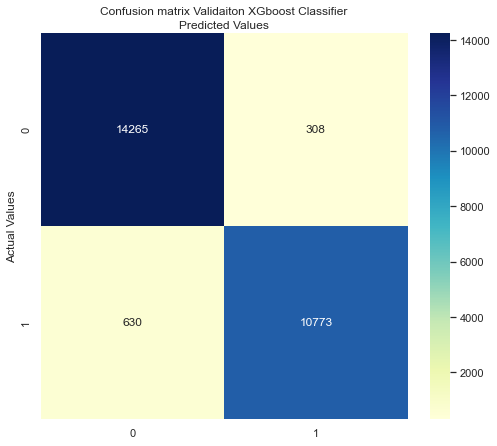

In [164]:
# Confusion matrix valid test

cm = confusion_matrix(y_valid, xboost_valid_pred)
cm = pd.DataFrame(cm)


#plot confusion matrix
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot = True,cmap="YlGnBu", fmt='g');
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Validaiton XGboost Classifier');
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');
tick_marks = [0.5, 1.5]

Unlike the "Random Forest Classifier, " the model better predicted true positives and negatives and consequently reduced false positives and nagatives. This is due both to accurate implementation of gradient boosting  and to the fact that 'hyper parameter tuning' was opted for.

# Considerations from a Business Perspective

The use of machine learning models to assess the degree to which customers of different airlines are satisfied or not could bring additional benefits from a publicity, improvement and customer increase point of view by going to reinforce key points and define, improve or eliminate points that promote an increase in dissatisfied customers in addition to improvement from an economic management point of view of the companies' services and assets.